In [1]:
import lumberjack as lj
import the_new_hill as ch
import os
import pandas as pd

In [2]:
sortby = ['SLEN', 'PDAT']
ncbi_database = ['nuccore', 'protein']
my_mail = 'thomas.huber@evobio.eu'
my_API_key = '7c7333f5a6fbaac7af1a67a8b70edc19e309'
#Entrez.email = my_mail
#Entrez.api_key = my_API_key

query = 'coi[Gene Name]+bufotes[Organism]+srcdb​_refseq[prop]'
query = 'noctuidae[Organism]+srcdb​_refseq[prop]'

In [3]:
url = 'https://cipresrest.sdsc.edu/cipresrest/v1'
appname = 'treepinkler'
appid = 'treepinkler-EE06FD418FD147B99EE41EA2B3B40E4B'
username = 'biotomme'
password = 'vacc1Niumm'

date_name = '2019_12_22'
gene_names = ['rpb1', 'rpb2', '28s']
taxon_name = 'Boletales'

pycipres_access = f'''URL={url}
APPNAME={appname}
APPID={appid}
USERNAME={username}
PASSWORD={password}
VERBOSE='''

In [4]:
client = ch.wake_up_cipres(pycipres_access, appname, appid, username, password, url)

URL=https://cipresrest.sdsc.edu/cipresrest/v1


In [5]:
add_seq_choice = 'True'
os.chdir('/Users/Thomsn/Documents/GitHub/Limonene')
working_dir = os.getcwd()
print(working_dir)

/Users/Thomsn/Documents/GitHub/Limonene


In [6]:
alignments = ch.spit_aligned(gene_names,
                                         working_dir,
                                         date_name,
                                         taxon_name,
                                         ncbi_database)

> rpb1: The processed fasta /Users/Thomsn/Documents/GitHub/Limonene/2019_12_22_Boletales_rpb1/Boletales_rpb1_mafft_no_outliers.fasta file was found and used for the alignment.
> Alignment for rpb1 was loaded into memory.
> rpb2: The processed fasta /Users/Thomsn/Documents/GitHub/Limonene/2019_12_22_Boletales_rpb2/Boletales_rpb2_mafft_no_outliers.fasta file was found and used for the alignment.
> Alignment for rpb2 was loaded into memory.
> 28s: No processed fasta file was found, therefore the raw file /Users/Thomsn/Documents/GitHub/Limonene/2019_12_22_Boletales_28s/Boletales_28s_mafft/output.mafft used for the alignment.
> Alignment for 28s was loaded into memory.


## The cipres_approach

Do you have additional sequences?

### Cut the alignment

In [7]:
trim_treshold = 50
cut_alignment = True

In [8]:
alignmenti = ch.alignmentrimmer(gene_names,
                    alignments,
                    cut_alignment = True,
                    treshold_percentage = trim_treshold)

The alignment was trimmed in the beginning until base 477 and in the end from base 1605. This means at least 50 % of all sequences have a present base there.
The alignment was trimmed in the beginning until base 68 and in the end from base 1162. This means at least 50 % of all sequences have a present base there.
The alignment was trimmed in the beginning until base 113 and in the end from base 1216. This means at least 50 % of all sequences have a present base there.


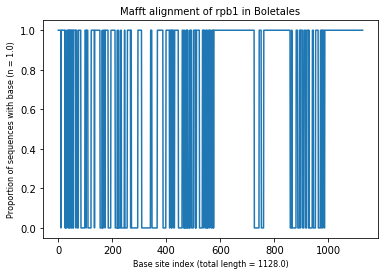

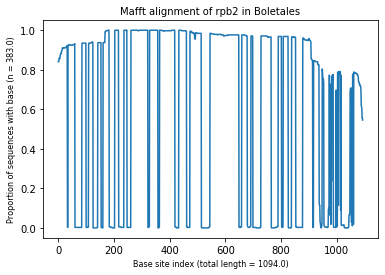

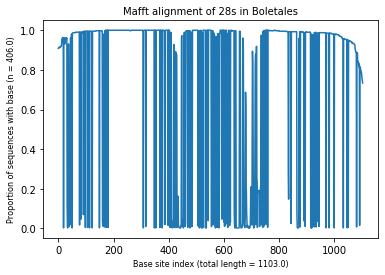

In [9]:
count_list = ch.alignoplot(gene_names,
               alignmenti)

### Concatenate all genes

In [10]:
alignment_cat = ch.concaterpillar(alignments,
                   gene_names,
                   working_dir,
                   date_name,
                   taxon_name,
                   ncbi_database)

------------------------- rpb1 - rpb2 - 28s -------------------------
> The total alignment was produced by concatenating the alignments of the genes rpb1, rpb2, 28s. It was saved as Boletales_rpb1_rpb2_28s_mafft.fasta.


In [11]:
alignment_cat

<<class 'Bio.Align.MultipleSeqAlignment'> instance (478 records of length 4418, ExtendedIUPACDNA()) at 12426f310>

### Single gene analyses

#### jModeltest

#### MrBayes

#### RaxML

In [12]:
ch.to_phylip(alignmenti,
             working_dir,
             taxon_name,
             gene_names,
             date_name,
             ncbi_database,
             concat = True)

------------------------- rpb1 - rpb2 - 28s -------------------------
> The total alignment was produced by concatenating the alignments of the genes rpb1, rpb2, 28s. It was saved as Boletales_rpb1_rpb2_28s_mafft.fasta.


'/Users/Thomsn/Documents/GitHub/Limonene/Boletales_rpb1_rpb2_28s_mafft.phy'

## RaxML does currently not work because the phy file does only contain the first gene, but the partitionfile all of the data...

In [13]:
ch.cipro_rax(client,
                gene_names,
                working_dir,
                taxon_name,
                date_name,
                ncbi_database,
                runtime = 48,
                concat = True)

URL=https://cipresrest.sdsc.edu/cipresrest/v1
Job=NGBW-JOB-RAXMLHPC8_REST_XSEDE-FC0199960DD0469E83CF2332F6E5DD38, not finished, stage=QUEUE
	2020-03-21T10:49:34-07:00: Added to run queue.
Metadata:
	statusEmail=true


In [15]:
handle = 'NGBW-JOB-RAXMLHPC8_REST_XSEDE-FC0199960DD0469E83CF2332F6E5DD38'
job = client.getJobStatus(handle)

In [17]:
jmod_dir = f'{working_dir}/{taxon_name}_{"_".join(gene_names)}_raxml_out'
if job.terminalStage:
    if not os.path.exists(jmod_dir):
        os.makedirs(jmod_dir)
        print(f'>> Directory {jmod_dir} was created.')
    job.downloadResults(directory=jmod_dir)

>> Directory /Users/Thomsn/Documents/GitHub/Limonene/Boletales_rpb1_rpb2_28s_raxml_out was created.
